In [ ]:
cd ../..

In [1]:
from src.agents import load_saved_experiment, obtain_cfes
from src.utils import plot_signal
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_excel(os.path.join("old_results", "experiment_1", "experiments.xlsx"))
results

,hash,start,dataset,algorithm,super_head,ones_mask,weights_losses,mapping_mode,timesteps,total_time,reward,step,proba,subsequences,num_changes,perc_changes,L1,L2,improvement_nun,valid
0,01132d32372b,2025-06-19 21:41:45,chinatown,DQN,False,True,"[1, 1, 0, 0]",default,100000,"15' 8""",0.37 ± 0.06,1.06 ± 0.24,0.97 ± 0.06,2.06 ± 0.24,5.66 ± 2.63,0.24 ± 0.11,2.02 ± 0.97,0.95 ± 0.25,0.37 ± 0.06,1.00 ± 0.00
1,255a5ce9935d,2025-06-19 21:41:45,chinatown,DQN,False,True,"[1, 0, 1, 0]",default,100000,"14' 33""",0.23 ± 0.00,0.18 ± 0.39,1.00 ± 0.00,1.00 ± 0.00,23.82 ± 0.39,0.99 ± 0.02,5.68 ± 1.16,1.52 ± 0.33,0.00 ± 0.00,1.00 ± 0.00
2,9032d097cb0e,2025-06-19 21:41:45,chinatown,DQN,False,True,"[0, 1, 1, 0]",default,100000,"14' 24""",-0.51 ± 0.03,1.08 ± 0.46,0.97 ± 0.06,2.03 ± 0.17,9.18 ± 1.06,0.38 ± 0.04,2.49 ± 0.61,1.03 ± 0.23,0.26 ± 0.03,1.00 ± 0.00
3,c151a4c4fbf3,2025-06-19 21:41:45,chinatown,DQN,False,True,"[1, 1, 1, 0]",default,100000,"14' 48""",-0.01 ± 0.03,6.09 ± 2.04,0.97 ± 0.05,2.96 ± 0.47,7.04 ± 2.11,0.29 ± 0.09,2.35 ± 0.74,1.04 ± 0.25,0.17 ± 0.03,1.00 ± 0.00
4,01132d32372b,2025-06-19 21:41:45,chinatown,DQN,False,True,"[1, 1, 0, 0]",default,100000,"15' 8""",0.37 ± 0.06,1.06 ± 0.24,0.97 ± 0.06,2.06 ± 0.24,5.66 ± 2.63,0.24 ± 0.11,2.02 ± 0.97,0.95 ± 0.25,0.37 ± 0.06,1.00 ± 0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,bfcee823b6ae,2025-06-27 08:41:38,beef,DQN,True,True,"[1, 1, 1, 0]",value,100000,"12' 34""",-0.11 ± 0.02,0.07 ± 0.25,0.92 ± 0.05,1.07 ± 0.25,469.93 ± 0.25,1.00 ± 0.00,95.42 ± 132.78,6.59 ± 9.94,0.00 ± 0.00,1.00 ± 0.00
640,386eef429634,2025-06-27 08:53:15,beef,DQN,True,True,"[1, 1, 0, 0]",value,100000,"12' 33""",-0.04 ± 0.03,0.70 ± 0.47,0.92 ± 0.05,1.70 ± 0.47,469.30 ± 0.47,1.00 ± 0.00,95.35 ± 132.75,6.59 ± 9.94,0.00 ± 0.00,1.00 ± 0.00
641,57a6bf322041,2025-06-27 08:54:15,beef,DQN,True,True,"[1, 0, 1, 0]",value,100000,"12' 34""",0.33 ± 0.03,0.00 ± 0.00,0.91 ± 0.05,1.00 ± 0.00,470.00 ± 0.00,1.00 ± 0.00,95.44 ± 132.77,6.59 ± 9.94,0.00 ± 0.00,1.00 ± 0.00
642,1fff8dda25bb,2025-06-27 09:05:50,beef,DQN,True,True,"[0, 1, 1, 0]",value,100000,"12' 32""",-0.63 ± 0.00,0.00 ± 0.00,0.91 ± 0.05,1.00 ± 0.00,470.00 ± 0.00,1.00 ± 0.00,95.44 ± 132.77,6.59 ± 9.94,0.00 ± 0.00,1.00 ± 0.00


In [3]:
# Paso 1: Extraer la parte numérica de improvement_nun (antes del " ±")
results['improvement_nun_val'] = results['improvement_nun'].str.split(' ± ').str[0].astype(float)

# Paso 2: Agrupar por dataset y weights_losses, y quedarnos con la fila con max improvement_nun_val
idx = results.groupby(['dataset', 'weights_losses'])['improvement_nun_val'].idxmax()

# Paso 3: Seleccionar esas filas
best_results = results.loc[idx]

# Paso 4: Sacar solo la columna hash si quieres solo eso
best_hashes = best_results.hash.tolist()

best_results[['dataset', 'weights_losses', 'hash', 'improvement_nun']]

,dataset,weights_losses,hash,improvement_nun
290,beef,"[0, 1, 1, 0]",837590141aaf,0.23 ± 0.14
289,beef,"[1, 0, 1, 0]",8b7d4b44aa1b,0.00 ± 0.00
288,beef,"[1, 1, 0, 0]",22df9267f382,0.24 ± 0.13
303,beef,"[1, 1, 1, 0]",631277378015,0.13 ± 0.08
18,chinatown,"[0, 1, 1, 0]",1db4e688405e,0.37 ± 0.13
1,chinatown,"[1, 0, 1, 0]",255a5ce9935d,0.00 ± 0.00
16,chinatown,"[1, 1, 0, 0]",3d9015dfb3c1,0.38 ± 0.05
15,chinatown,"[1, 1, 1, 0]",e86e0d4a4fd4,0.22 ± 0.03
98,ecg200,"[0, 1, 1, 0]",d40e08a9276b,0.26 ± 0.04
97,ecg200,"[1, 0, 1, 0]",e43f9a83185c,0.00 ± 0.00


In [4]:
agent, env, data = load_saved_experiment(hash_exp=best_hashes[0], directory=os.path.join("old_results", "experiment_1"))

Agent loaded successfully from old_results\experiment_1\837590141aaf\model.zip


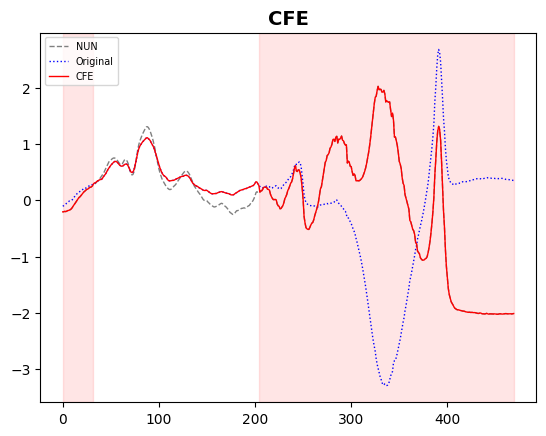

In [5]:
sample_id = 0
sample = data.get_sample(sample_id)
label = data.y_train_model[sample_id]
nun = data.get_nun(sample)
cfe_info = obtain_cfes(samples=[sample], labels=[label], nuns=[nun], env=env, agent=agent)[0]
fig, ax = plt.subplots()
plot_signal(X=sample, X2=nun, mask=cfe_info['mask'], ax=ax)

Dataset: chinatown, Weight: [0, 1, 1, 0], Hash: 1db4e688405e
Agent loaded successfully from old_results\experiment_1\1db4e688405e\model.zip
Dataset: chinatown, Weight: [1, 0, 1, 0], Hash: 255a5ce9935d
Agent loaded successfully from old_results\experiment_1\255a5ce9935d\model.zip
Dataset: chinatown, Weight: [1, 1, 0, 0], Hash: 3d9015dfb3c1
Agent loaded successfully from old_results\experiment_1\3d9015dfb3c1\model.zip
Dataset: chinatown, Weight: [1, 1, 1, 0], Hash: e86e0d4a4fd4
Agent loaded successfully from old_results\experiment_1\e86e0d4a4fd4\model.zip
Dataset: ecg200, Weight: [0, 1, 1, 0], Hash: d40e08a9276b
Agent loaded successfully from old_results\experiment_1\d40e08a9276b\model.zip
Dataset: ecg200, Weight: [1, 0, 1, 0], Hash: e43f9a83185c
Agent loaded successfully from old_results\experiment_1\e43f9a83185c\model.zip
Dataset: ecg200, Weight: [1, 1, 0, 0], Hash: 306df597b8af
Agent loaded successfully from old_results\experiment_1\306df597b8af\model.zip
Dataset: ecg200, Weight: [1, 

Text(0.5, 0.95, 'CFEs for different datasets and weights')

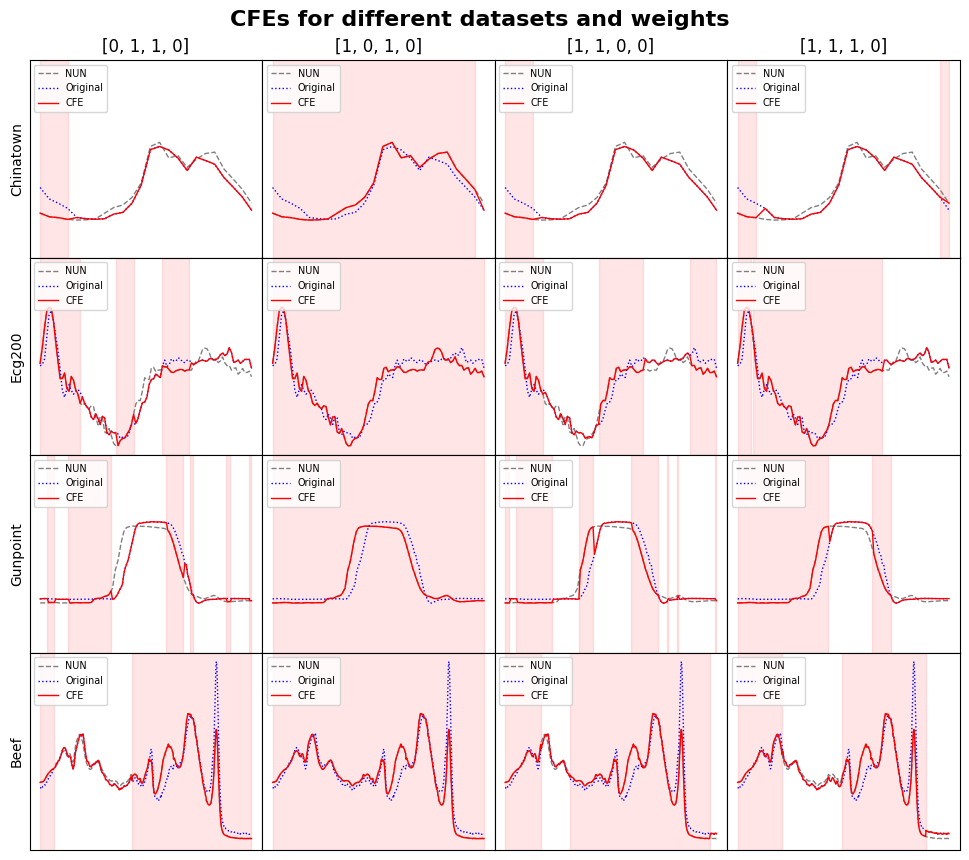

In [6]:
sample_id = 0

fig, axes = plt.subplots(4, 4, figsize=(12, 10), sharey=True)
datasets = best_results['dataset'].unique()
datasets = ["chinatown", "ecg200", "gunpoint", "beef"]
weights = best_results['weights_losses'].unique()

for i, dataset in enumerate(datasets):
    for j, weight in enumerate(weights):
        ax = axes[i, j]
        exp_info = best_results[(best_results['dataset'] == dataset) & (best_results['weights_losses'] == weight)]
        
        exp_hash = exp_info.hash.values[0]
        print(f"Dataset: {dataset}, Weight: {weight}, Hash: {exp_hash}")
        agent, env, data = load_saved_experiment(hash_exp=exp_hash, directory=os.path.join("old_results", "experiment_1"))
        
        sample_id = max(0, min(sample_id, data.get_num_samples()[0] - 1))
        sample = data.get_sample(index=sample_id)
        label = data.y_train_model[sample_id]
        nun = data.get_nun(sample)
        cfe_info = obtain_cfes(samples=[sample], labels=[label], nuns=[nun], env=env, agent=agent)[0]
        plot_signal(X=sample, X2=nun, mask=cfe_info['mask'], ax=ax)
        if i == 0:
            ax.set_title(weight)
        else:
            ax.set_title('')
        if j == 0:
            ax.set_ylabel(dataset.capitalize())
        else:
            ax.set_ylabel('')

        ax.set_xticks([])
        ax.set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0, top=0.9)
fig.suptitle('CFEs for different datasets and weights', fontsize=16, fontweight='bold', y=0.95, x=0.5)
# plt.tight_layout()

Dataset: chinatown, Weight: [0, 1, 1, 0], Hash: 1db4e688405e
Agent loaded successfully from old_results\experiment_1\1db4e688405e\model.zip
Dataset: chinatown, Weight: [1, 0, 1, 0], Hash: 255a5ce9935d
Agent loaded successfully from old_results\experiment_1\255a5ce9935d\model.zip
Dataset: chinatown, Weight: [1, 1, 0, 0], Hash: 3d9015dfb3c1
Agent loaded successfully from old_results\experiment_1\3d9015dfb3c1\model.zip
Dataset: chinatown, Weight: [1, 1, 1, 0], Hash: e86e0d4a4fd4
Agent loaded successfully from old_results\experiment_1\e86e0d4a4fd4\model.zip
Dataset: ecg200, Weight: [0, 1, 1, 0], Hash: d40e08a9276b
Agent loaded successfully from old_results\experiment_1\d40e08a9276b\model.zip
Dataset: ecg200, Weight: [1, 0, 1, 0], Hash: e43f9a83185c
Agent loaded successfully from old_results\experiment_1\e43f9a83185c\model.zip
Dataset: ecg200, Weight: [1, 1, 0, 0], Hash: 306df597b8af
Agent loaded successfully from old_results\experiment_1\306df597b8af\model.zip
Dataset: ecg200, Weight: [1, 

Text(0.5, 0.95, 'CFEs for different datasets and weights')

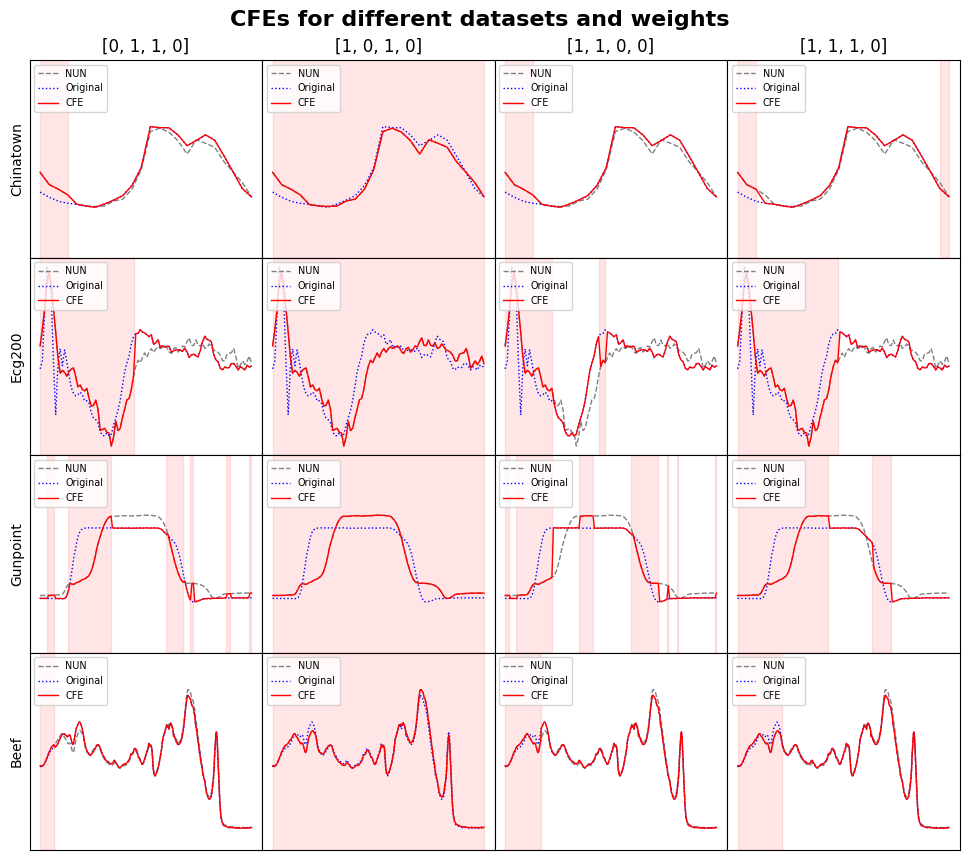

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10), sharey=True)
datasets = best_results['dataset'].unique()
datasets = ["chinatown", "ecg200", "gunpoint", "beef"]
weights = best_results['weights_losses'].unique()

for i, dataset in enumerate(datasets):
    for j, weight in enumerate(weights):
        ax = axes[i, j]
        exp_info = best_results[(best_results['dataset'] == dataset) & (best_results['weights_losses'] == weight)]
        
        exp_hash = exp_info.hash.values[0]
        print(f"Dataset: {dataset}, Weight: {weight}, Hash: {exp_hash}")
        agent, env, data = load_saved_experiment(hash_exp=exp_hash, directory=os.path.join("old_results", "experiment_1"))
        
        sample, label, nun = data.get_test_samples(n_samples=1)
        cfe_info = obtain_cfes(samples=sample, labels=label, nuns=nun, env=env, agent=agent)[0]
        plot_signal(X=sample.squeeze(0), X2=nun.squeeze(0), mask=cfe_info['mask'], ax=ax)
        if i == 0:
            ax.set_title(weight)
        else:
            ax.set_title('')
        if j == 0:
            ax.set_ylabel(dataset.capitalize())
        else:
            ax.set_ylabel('')

        ax.set_xticks([])
        ax.set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0, top=0.9)
fig.suptitle('CFEs for different datasets and weights', fontsize=16, fontweight='bold', y=0.95, x=0.5)
# plt.tight_layout()

In [8]:
from src.utils import predict_proba
load_saved_experiment(hash_exp='837590141aaf', directory=os.path.join("old_results", "experiment_1"))
sample, label, nun = data.get_test_samples(n_samples=1)
cfe_info = obtain_cfes(samples=sample, labels=label, nuns=nun, env=env, agent=agent)[0]

Agent loaded successfully from old_results\experiment_1\837590141aaf\model.zip


In [9]:
print(f"prob_original={predict_proba(model=data.model, data=cfe_info['sample'])}")
print(f"prob_nun={predict_proba(model=data.model, data=cfe_info['nun'])}")
print(f"prob_cfe={predict_proba(model=data.model, data=cfe_info['cfe'])}")

prob_original=(tensor([[3.0386e-03, 1.5683e-02, 1.8396e-02, 9.6207e-01, 8.1489e-04]],
       device='cuda:0'), 3)
prob_nun=(tensor([[1.5107e-03, 2.8466e-03, 1.1481e-02, 9.8392e-01, 2.4668e-04]],
       device='cuda:0'), 3)
prob_cfe=(tensor([[1.6691e-03, 7.4154e-03, 6.5630e-03, 9.8411e-01, 2.4469e-04]],
       device='cuda:0'), 3)
